# Complex Random Variables

## A Single Complex Random Variable

**Definition**   
A **complex random variable** $ Z $ is defined as:

$$
Z = X + jY,
$$

where $ X $ and $ Y $ are real-valued random variables representing the real and imaginary components, respectively. Thus, a complex random variable can be regarded as a two-dimensional random vector with components $ X $ and $ Y $.

### Mean and Variance

For a complex random variable $ Z $, the **mean** and **variance** are defined as follows:

$$
\mathbb{E}[Z] = \mathbb{E}[X] + j\mathbb{E}[Y]
$$

$$
\text{Var}[Z] = \mathbb{E}[|Z|^2] - |\mathbb{E}[Z]|^2 = \text{Var}[X] + \text{Var}[Y].
$$

#### Proof:

**We show that the variance of the complex random variable $Z$ is the sum of the variances of its real and imaginary parts.**


We start with a complex random variable defined by

$$
Z = X + jY,
$$

where $X$ and $Y$ are real-valued random variables and $j$ is the imaginary unit.

The **variance** of $Z$ is defined as

$$
\operatorname{Var}[Z] = \mathbb{E}[|Z|^2] - |\mathbb{E}[Z]|^2.
$$

**Compute $\mathbb{E}[|Z|^2]$**

Recall that the magnitude squared of $Z$ is given by

$$
|Z|^2 = Z Z^* = (X + jY)(X - jY) = X^2 + Y^2.
$$

Taking the expectation, we have

$$
\mathbb{E}[|Z|^2] = \mathbb{E}[X^2 + Y^2] = \mathbb{E}[X^2] + \mathbb{E}[Y^2].
$$

**Compute $|\mathbb{E}[Z]|^2$**

The mean of $Z$ is

$$
\mathbb{E}[Z] = \mathbb{E}[X] + j\mathbb{E}[Y].
$$

The magnitude squared of $\mathbb{E}[Z]$ is then

$$
|\mathbb{E}[Z]|^2 = |\mathbb{E}[X] + j\mathbb{E}[Y]|^2 = (\mathbb{E}[X])^2 + (\mathbb{E}[Y])^2.
$$

**Substitute to the definition** 

Now substitute the results from the above steps into the variance definition:

$$
\operatorname{Var}[Z] = \mathbb{E}[|Z|^2] - |\mathbb{E}[Z]|^2 = \Big(\mathbb{E}[X^2] + \mathbb{E}[Y^2]\Big) - \Big((\mathbb{E}[X])^2 + (\mathbb{E}[Y])^2\Big).
$$

Rearrange the terms:

$$
\operatorname{Var}[Z] = \Big(\mathbb{E}[X^2] - (\mathbb{E}[X])^2\Big) + \Big(\mathbb{E}[Y^2] - (\mathbb{E}[Y])^2\Big).
$$

By the definition of the variance of a real random variable, we have:

$$
\operatorname{Var}[X] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2, \quad \operatorname{Var}[Y] = \mathbb{E}[Y^2] - (\mathbb{E}[Y])^2.
$$

Thus, the expression simplifies to

$$
\operatorname{Var}[Z] = \operatorname{Var}[X] + \operatorname{Var}[Y].
$$


$$
\boxed{\operatorname{Var}[Z] = \operatorname{Var}[X] + \operatorname{Var}[Y].}
$$

This completes the proof. $\blacksquare$

## A Single Complex Gaussian Random Variable 

The probability density function (PDF) of a complex random variable is defined as the joint PDF of its real and imaginary components. If $ X $ and $ Y $ are jointly Gaussian random variables, then $ Z = X + jY $ follows a **complex Gaussian distribution**.

For a **zero-mean** complex Gaussian random variable $ Z $ with independent and identically distributed (iid) real and imaginary components, the PDF is given by:

$$
f_Z (z) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)
$$

which can be rewritten in terms of the magnitude $ |z| $ as:

$$
f_Z (z) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{|z|^2}{2\sigma^2}\right).
$$

This form highlights the *circular symmetry* of the complex Gaussian distribution when the real and imaginary parts are iid.

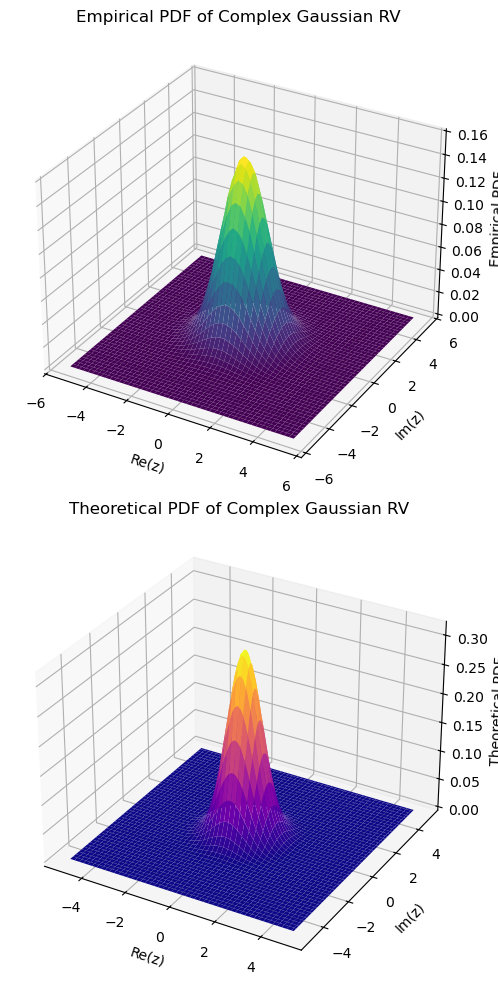

Empirical Mean: 0.000465 + 0.000082i
Theoretical Mean: 0.000000
Empirical Variance: 1.999533
Theoretical Variance: 2.000000


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = int(1e7)  # Number of samples
sigma = 1  # Standard deviation of the real and imaginary parts

# Generate empirical data for Z
X = sigma * np.random.randn(N)  # Real part
Y = sigma * np.random.randn(N)  # Imaginary part
Z = X + 1j * Y  # Complex Gaussian random variable

# Empirical mean and variance
empirical_mean = np.mean(Z)
empirical_variance = np.var(Z)

# Theoretical mean and variance
theoretical_mean = 0
theoretical_variance = 2 * sigma**2

# PDF plot range
z_real = np.linspace(-5 * sigma, 5 * sigma, 100)
z_imag = np.linspace(-5 * sigma, 5 * sigma, 100)
Zr, Zi = np.meshgrid(z_real, z_imag)
Z_grid = Zr + 1j * Zi
pdf_theoretical = (1 / (np.pi * sigma**2)) * np.exp(-np.abs(Z_grid)**2 / sigma**2)

# Create figure
fig = plt.figure(figsize=(12, 10))

# Plot empirical PDF using a 2D histogram
ax1 = fig.add_subplot(2, 1, 1, projection='3d')
hist, xedges, yedges = np.histogram2d(X, Y, bins=50, density=True)
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
Xc, Yc = np.meshgrid(xcenters, ycenters)

# Plot empirical histogram
ax1.plot_surface(Xc, Yc, hist.T, cmap="viridis", edgecolor='none')
ax1.set_xlabel("Re(z)")
ax1.set_ylabel("Im(z)")
ax1.set_zlabel("Empirical PDF")
ax1.set_title("Empirical PDF of Complex Gaussian RV")

# Plot theoretical PDF
ax2 = fig.add_subplot(2, 1, 2, projection='3d')
ax2.plot_surface(Zr, Zi, pdf_theoretical, cmap="plasma", edgecolor='none')
ax2.set_xlabel("Re(z)")
ax2.set_ylabel("Im(z)")
ax2.set_zlabel("Theoretical PDF")
ax2.set_title("Theoretical PDF of Complex Gaussian RV")

# Display the plots
plt.tight_layout()
plt.show()

# Print empirical and theoretical mean and variance
print(f"Empirical Mean: {empirical_mean.real:.6f} + {empirical_mean.imag:.6f}i")
print(f"Theoretical Mean: {theoretical_mean:.6f}")
print(f"Empirical Variance: {empirical_variance:.6f}")
print(f"Theoretical Variance: {theoretical_variance:.6f}")


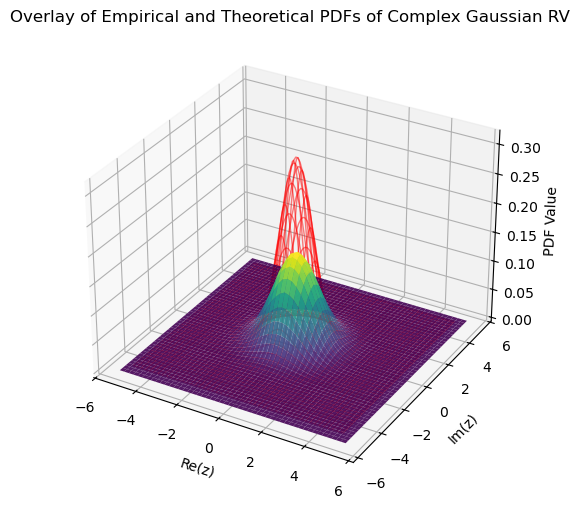

In [16]:
# Create a figure for overlaying the empirical and theoretical PDFs
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot empirical PDF as a surface plot
ax.plot_surface(Xc, Yc, hist.T, cmap="viridis", alpha=0.9, edgecolor='none', label="Empirical PDF")

# Plot theoretical PDF as a wireframe
ax.plot_wireframe(Zr, Zi, pdf_theoretical, color='red', linewidth=1, label="Theoretical PDF", alpha=0.5)

# Labels and title
ax.set_xlabel("Re(z)")
ax.set_ylabel("Im(z)")
ax.set_zlabel("PDF Value")
ax.set_title("Overlay of Empirical and Theoretical PDFs of Complex Gaussian RV")

# Show plot
plt.show()


Possible reasons why the theoretical PDF appears higher than the numerical PDF:

1. **Histogram Binning Effects** – The empirical PDF is based on discrete bins, which may smooth out peaks.  
2. **Normalization Differences** – The histogram may not perfectly match the theoretical density.  
3. **Finite Sample Size** – The empirical PDF is an approximation based on a limited number of samples.  

Increasing the number of bins, using KDE, or increasing the sample size can improve the match between the two PDFs.

As will be observed later, when we compare the theoretical and numerical PDFs for each real and imaginary part individually, they closely match each other.